In [1]:
import matplotlib.pyplot as plt
import numpy as np
import operator

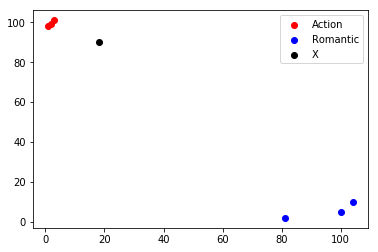

In [4]:
# Classify the data by label(action & Romantic movies)

x1=np.array([3,2,1])
x2=np.array([104,100,81])
y1=np.array([101,99,98])
y2=np.array([10,5,2])
scatter1=plt.scatter(x1,y1,c='r')
scatter2=plt.scatter(x2,y2,c='b')

# Unknown Data
x=np.array([18])
y=np.array([90])
scatter3=plt.scatter(x,y,c='k')

# Plot
plt.legend(handles=[scatter1,scatter2,scatter3],labels=['Action','Romantic','X'],loc='best')

plt.show()






In [6]:
# Input known data

x_data=np.array([[3,104],
               [2,100],
               [1,81],
               [101,10],
               [99,5],
               [81,2]])
y_data=np.array(['A','A','A','B','B','B'])

x_test=np.array([18,90])


In [7]:
# Size of sample

x_data_size= x_data.shape[0]
x_data_size

6

In [9]:
#deplicate x_test
#np.tile(x,(a,b))
# x is copied,(a,b)means how many rows and times 
np.tile(x_test,(x_data_size,1))
# x is copied, 6 rows and 1 column

array([[18, 90],
       [18, 90],
       [18, 90],
       [18, 90],
       [18, 90],
       [18, 90]])

In [12]:
# Build calculation
diff = np.tile(x_test,(x_data_size,1))-x_data
sqdiff=diff**2
sqDistances= sqdiff.sum(axis=1)
distances= sqDistances**0.5
distances

array([ 20.51828453,  18.86796226,  19.23538406, 115.27792503,
       117.41379817, 108.2266141 ])

In [11]:
# Sort by index
#sorted by the value ascently, but show the position
sortDistances=distances.argsort()
sortDistances

array([1, 2, 0, 5, 3, 4], dtype=int64)

In [29]:
# Label Count
Count={}
# Set k, get the nearest 5 value
k = 5
for i in range(k):
    label=y_data[sortDistances[i]]
    Count[label]=Count.get(label,0)+1
'''
sortDistances[i] only get from 0-4(nearest 5)
y_data[sortDistances[i]] will get 5 labels
'A','A','A','B','B'
label=('A','A','A','B','B') is a tuple

Count is a dic
dict.get(key, default=None)
if key doesn't exist, it will return default.
First time:
Count.get('A',0)+1--> 0+1-->1
Second time:
Count.get('A',0)+1--> 1+1-->2

'''


"\nsortDistances[i] only get from 0-4(nearest 5)\ny_data[sortDistances[i]] will get 5 labels\n'A','A','A','B','B'\nlabel=('A','A','A','B','B') is a tuple\n\nCount is a dic\ndict.get(key, default=None)\nif key doesn't exist, it will return default.\nFirst time:\nCount.get('A',0)+1--> 0+1-->1\nSecond time:\nCount.get('A',0)+1--> 1+1-->2\n\n"

In [30]:
Count.items()

dict_items([('A', 3), ('B', 2)])

In [32]:
sortedClassCount = sorted(Count.items(),key=operator.itemgetter(1), reverse=True)
'''
dic.itmes means key+value

key  is the value to sort
operator.itemgetter(1) means get the items[1] as key word

reverse

'''

sortedClassCount

[('A', 3), ('B', 2)]

In [33]:
knnclass = sortedClassCount[0][0]
knnclass

'A'